# **Online Retail Analysis - Capstone Project**

# Data Visualisation

## Objectives

- Create clear insightful visualisations
- Key insights and conclusions for each visusalisation
- Hypotheses and t test
- RFM clustering
- overall conclusion
- Suggested solutions for improvements


## Inputs

- The processed dataset can be found [here](..\data_set\processed_data\Processed_Online_Retail.csv)

## Outputs

- Insightful visualisations
- Key insights and conclusions

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\moby1\\Documents\\Capstone-Project\\Online_Retail_Analysis_Capstone_Project\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\moby1\\Documents\\Capstone-Project\\Online_Retail_Analysis_Capstone_Project'

Import libraries needed for the project

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

---

It is crucial in any online retail industry to understand:

- Types of customers they have
- Purchasing habits of customers
- Sales and seasonality
- Popular products
- What can be done in order to improve sales


Identifying and understanding the above allows a business strategy of:

- Customer segmentation: Knowing customer types helps tailor marketing and services to different needs.
- Targeted marketing: Understanding purchasing habits allows for personalised promotions and product recommendations.
- Sales forecasting: Tracking sales patterns and seasonality improves inventory planning and resource allocation.
- Product optimisation: Identifying popular and underperforming products supports smarter inventory decisions and product development.
- Sales growth: Insights from data help shape strategies to boost conversions, customer retention, and overall revenue.

# Load dataset

In [5]:
#load processed data and display

df = pd.read_csv("C:\\Users\\moby1\\Documents\\Capstone-Project\\Online_Retail_Analysis_Capstone_Project\\data_set\\processed_data\\Processed_Online_Retail.csv") 

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Transaction_Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# Monthly Trend Analysis

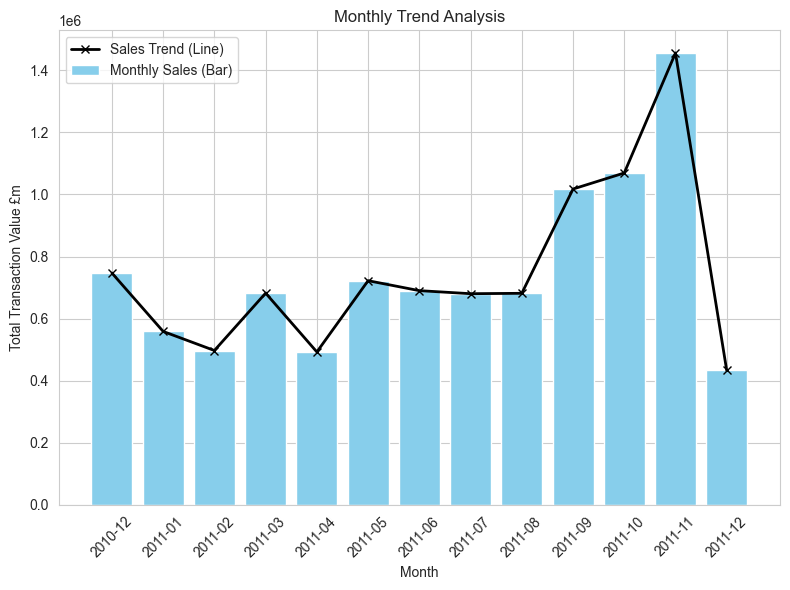

In [6]:
#convert date and create month column
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M').astype(str)

#group by month and sum transactions for each month
monthly_sales = df.groupby('Month')['Total_Transaction_Value'].sum().reset_index()

#create figure and axes
plt.figure(figsize=(8, 6)) #plot size

#bar chart plot
plt.bar(
    monthly_sales['Month'], #x axis
    monthly_sales['Total_Transaction_Value'], #y axis
    color='skyblue', #colour of bars
    label='Monthly Sales (Bar)'
)

#line chart plot
plt.plot(
    monthly_sales['Month'], #x axis
    monthly_sales['Total_Transaction_Value'], #y axis
    color='black', #colour of line
    marker='x',
    linewidth=2,
    label='Sales Trend (Line)'
)


plt.title('Monthly Trend Analysis') #title of plot
plt.xlabel('Month') #label of x axis
plt.ylabel('Total Transaction Value £m') #label of y axis
plt.xticks(rotation=45) # rotation of label for readability
plt.legend()  #add legend for clarity
plt.tight_layout() #adjust layout to prevent overlappying content
plt.show() #display plot

The above chart illustrates the monthly total transaction values from December 2010 through December 2011 (13 months).

**Key Insights:**

- Post-holiday dip observed in January 2011, likely due to seasonal slowdown after December (Christmas) shopping.
- Flat to modest growth from January to June 2011 (£0.5m to 0.75m), with fluctuations possibly linked to inventory or seasonal cycles.
- Significant spike in sales from September to November 2011, peaking in November (£1.5m) likely driven by pre-holiday promotions and shopping events.
- Sharp drop in December 2011, possibly due to seasonality habits, stock out issues, operational disruptions (logistics and distribution closures and delays).

**Conclusion:**

The trend analysis shows a steady sales increase throughout 2011, peaking sharply in Q4, especially November. This is likely due to seasonal promotions such as Black Friday and Christmas. This trend indicates strong year-end performance and highlights opportunities for future seasonal marketing and improved inventory planning.

**Recommendations and Improvements:**

- Implement targeted promotions and personalised marketing (loyalty programs) to boost sales during slow months and maintain consistent year-round engagement.
- Improve inventory forecasting and streamline logistics to prevent stockouts and operational delays, especially after peak seasons.
- Diversify revenue streams to reduce reliance on Q4, exploring new markets, products, and sales channels for more stable growth such as subscription/repeat-purchase models.

# Sales by Day Analysis

In [ ]:
#extract days of the week and creates new column for dayofweek
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name() 

#group by day and sum sales
sales_by_day = df.groupby('DayOfWeek')['Total_Transaction_Value'].sum().reset_index()

#order by actual weekday order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day['DayOfWeek'] = pd.Categorical(sales_by_day['DayOfWeek'], categories=days_order, ordered=True)
sales_by_day = sales_by_day.sort_values('DayOfWeek')

In [19]:
fig = px.pie( #plot pie chart
    sales_by_day, #data source
    names='DayOfWeek', #labels
    values='Total_Transaction_Value',#values
    title='Sales Distribution by Day of the Week', #title
    color_discrete_sequence=px.colors.sequential.Blues  #blue gradient colors  
)

fig.update_traces(textinfo='percent+label')  #show both label and percent on chart
fig.show() #display plot

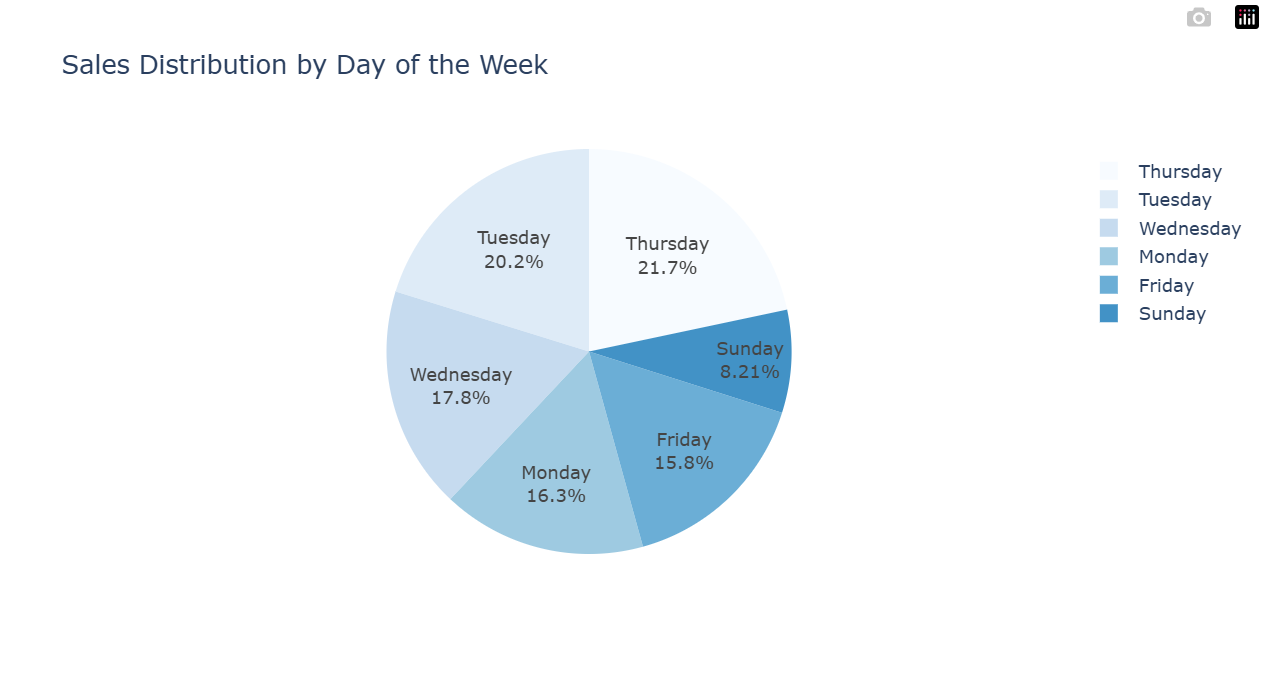

**Key Insights:**

- Highest total transaction value day, Thursday (£2.1m) followed by Tuesday at (£1.9m)
- Lowest total trasnaction value day, Sunday (798k)
- Sales are relatively evenly distributed throughout the week, with Thursday and Tuesday accounting for the highest proportions (20%). Sunday has the lowest sales share (8%), indicating lower customer activity on weekends. Sundays may be lowest due to customers liftstyle routine (could be religious or general liftstyle) as well as businesses do not tend to ship out products the same day.

**Conclusion:**

Sales activity peaks mid-week, suggesting that marketing efforts or promotions on these days could maximise revenue. The lower weekend sales highlight an opportunity to boost weekend performance through targeted campaigns. Knowing the busiest and the quietest days will help with inventory management preventing delays such as stockouts. It may also highlight opportunties for personalised attention to engage with customers for retention on the quiet days. Understanding these types of trends will support better forecasting, financial planning and inventory management.

**Recommendations for Improvements:**

- Increase promotional activities on Sundays to stimulate weekend sales.
- Focus marketing efforts on Thursday and Tuesday, when customer activity is highest, to further capitalise on peak days.
- Analyse customer behavior to understand weekend slumps and tailor strategies to encourage weekend shopping.

# High Value Customers Analysis

Displaying top 6 unique customers by quantity, price and total transaction value

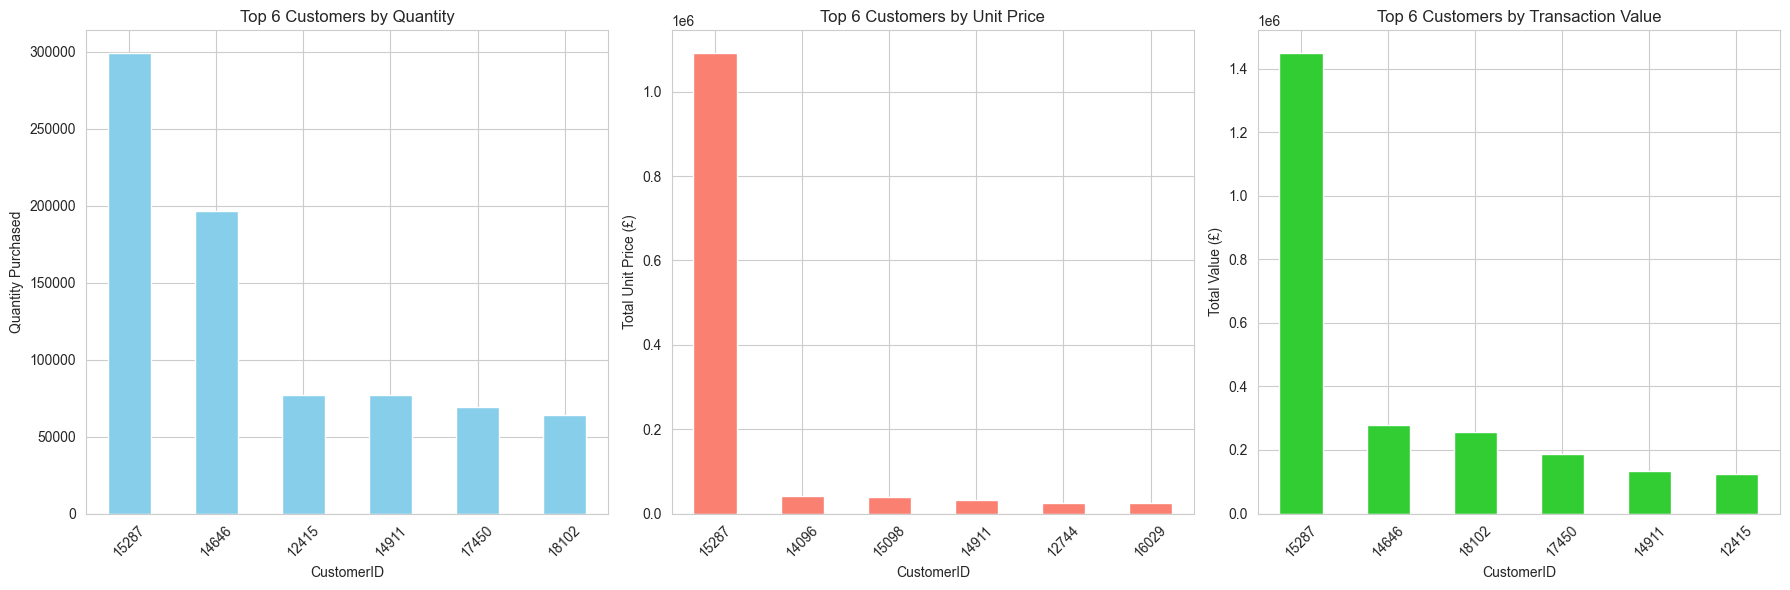

In [9]:
#top 6 customers by Quantity
top_quantity = (
    df.groupby('CustomerID')['Quantity'] #group customerID and Quantity by sum
    .sum()
    .sort_values(ascending=False)
    .head(6) #6 only
)

#top 6 customers by Unit Price
top_unit_price = (
    df.groupby('CustomerID')['UnitPrice'] #group customerID and UnitPrice by sum
    .sum()
    .sort_values(ascending=False)
    .head(6) #6 only
)

#top 6 customers by Total Transaction Value
top_transaction_value = (
    df.groupby('CustomerID')['Total_Transaction_Value'] #group customerID and Total_Transaction_Value by sum
    .sum()
    .sort_values(ascending=False)
    .head(6) #6 only
)

#3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

#plot 1 Quantity
top_quantity.plot(
    kind='bar',
    color='skyblue', 
    ax=axes[0] #first plot
)
axes[0].set_title('Top 6 Customers by Quantity') #title of plot
axes[0].set_xlabel('CustomerID') #label of x axis
axes[0].set_ylabel('Quantity Purchased') #label of y axis
axes[0].tick_params(axis='x', rotation=45) #rotation of x axis labels for readability

# Plot 2 Unit Price
top_unit_price.plot(
    kind='bar',
    color='salmon',
    ax=axes[1] #second plot
)
axes[1].set_title('Top 6 Customers by Unit Price') #title of plot
axes[1].set_xlabel('CustomerID') #label of x axis
axes[1].set_ylabel('Total Unit Price (£)') #label of y axis
axes[1].tick_params(axis='x', rotation=45) #rotation of x axis labels for readability

# Plot 3 Total Transaction Value
top_transaction_value.plot(
    kind='bar',
    color='limegreen',
    ax=axes[2] #third plot
)
axes[2].set_title('Top 6 Customers by Transaction Value') #title of plot
axes[2].set_xlabel('CustomerID') #label of x axis
axes[2].set_ylabel('Total Value (£)') #label of y axis
axes[2].tick_params(axis='x', rotation=45) #rotation of x axis labels for readability


plt.tight_layout() #adjust layout to prevent overlappying content
plt.show() #display plots

**Key Insights:**

- Customer 15287 is the most valuable customer overall, leading across all three metrics.
- There is a long-tail distribution, where one customer dominates and others trail significantly behind.

**Conclusion:**

Customer 15287 is the standout contributor, leading significantly in quantity purchased, unit price, and overall transaction value. This indicates their critical importance to the business's revenue. The other top customers show much lower spending and purchase volumes, highlighting a steep drop-off after the top buyer. 

**Recommendations and Improvements:**

Focusing on maintaining and growing relationships with high-value customers like 15287, while finding strategies to boost engagement from others, could maximize sales and profitability. For the other customers a solution could consist of marketing campaigns, personalised offers/ incentives, engagement on multiple platforms and feedback forms.

# RFM Clustering Analysis

To better understand the customer base after the last visualisation, I want to display RFM (recency, frequency and monetary) clustering. 

- Recency: how recently a customer made a purchase.
- Frequency: how often they purchase.
- Monetary: how much money they spend. 

RFM clustering segments customers based on their purchasing behavior, allowing businesses to identify loyal, new, at-risk, or inactive customers. This enables targeted marketing, improves customer retention, and helps allocate resources more efficiently. By uncovering behavioral patterns, RFM provides valuable insights that support strategic decisions in marketing, product offerings, and customer engagement.

In [10]:
#convert InvoiceDate to datetime if not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#set reference date for recency calculation
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

#calculate RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  #recency
    'InvoiceNo': 'nunique', #frequency (unique invoices)
    'Total_Transaction_Value': 'sum' #monetary
}).reset_index()

rfm.rename(columns={
    'InvoiceDate': 'Recency', #rename
    'InvoiceNo': 'Frequency', #rename
    'Total_Transaction_Value': 'Monetary' #rename
}, inplace=True)

#scale the RFM data
scaler = StandardScaler() #removing the mean and scaling to unit variance
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

#perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42) #4 distinct clusters and random seed
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled) #assigns each customer to a cluster

#display clusters
print(rfm.head())

#analyse cluster characteristics
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

print(cluster_summary)

c:\Users\moby1\Documents\Capstone-Project\Online_Retail_Analysis_Capstone_Project\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



   CustomerID  Recency  Frequency  Monetary  Cluster
0       12346      326          2      0.00        2
1       12347        2          7   4310.00        0
2       12348       75          4   1797.24        0
3       12349       19          1   1757.55        0
4       12350      310          1    334.40        2
        Recency Frequency   Monetary      
           mean      mean       mean count
Cluster                                   
0          31.0       6.5     2550.7  2920
1           1.0    2177.0  1447972.8     1
2         295.4       1.6      403.5   634
3         152.5       2.6      702.6   817


**Key Insights:**

The analysis above segments customers into meaningful clusters:

- Cluster 0 includes high-spending, less frequent visitors who are ideal for retention and upselling
- Cluster 2 consists of frequent and recent visitors with lower spend who can benefit from loyalty incentives to boost their transaction size.

**Conclusion:**

Customers who purchased recently are more responsive to promotions, while inactive ones may need re-engagement. Frequent buyers tend to spend less per visit but show strong loyalty, whereas high spenders with fewer visits offer upsell opportunities.

**Recommendations and Improvements:**

Tailor marketing strategies to each customer group to maximize lifetime value, improve customer loyalty, and optimize marketing spend.



# Most Popular Products Analysis

Below illustrates the top 6 most popular products sold by quantity

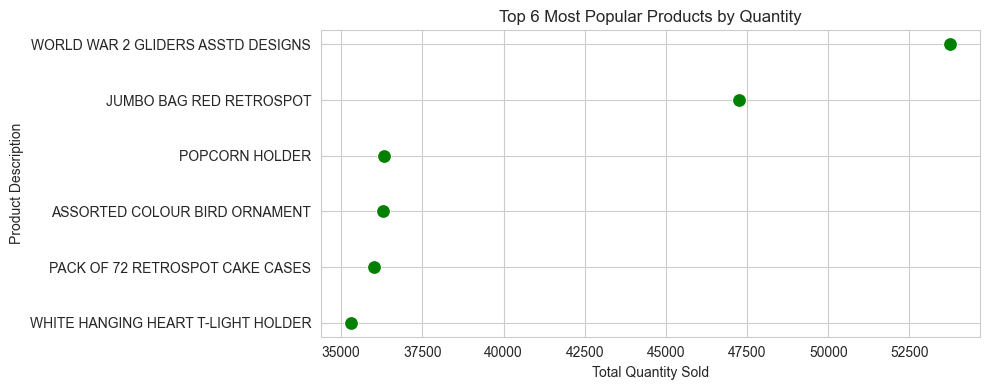

In [11]:
#top 6 products
popular_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(6).reset_index()

plt.figure(figsize=(10,4)) #plot size
sns.scatterplot(data=popular_products, x='Quantity', y='Description', s=100, color='green') #plot scatter
plt.title('Top 6 Most Popular Products by Quantity') #title of plot
plt.xlabel('Total Quantity Sold') #label of x axis
plt.ylabel('Product Description') #label of y axis
plt.tight_layout()  #adjust layout to prevent overlapping content
plt.show() #display the plot

**Key Insights:**

- The most popular product is "WORLD WAR 2 GLIDERS ASSTD DESIGNS" with the highest quantity sold, exceeding 52,500 units.
- Other highly sold products include JUMBO BAG RED RETROSPOT and POPCORN HOLDER, with quantities around 47,500 and 37,500.
- The remaining products ASSORTED COLOUR BIRD ORNAMENT, PACK OF 72 RETROSPOT CAKE CASES and WHITE HANGING HEART T-LIGHT HOLDER have lower sales, with quantities close to 35,000 units.

**Conclusion:**

The chart highlights a strong customer preference for the top two products, especially the WORLD WAR 2 GLIDERS ASSTD DESIGNS. The other products also have significant sales but are less popular compared to these top performers.

**Recommendations and Improvements:**

- Focus on promoting bestsellers to maximize sales.
- Stock adequate quantities of these popular items to meet customer demand.
- Analyse customer preferences further to understand why these products are favored to inform future product development or marketing campaigns.

Below illustrates the top 6 most popular products sold by total transaction value.

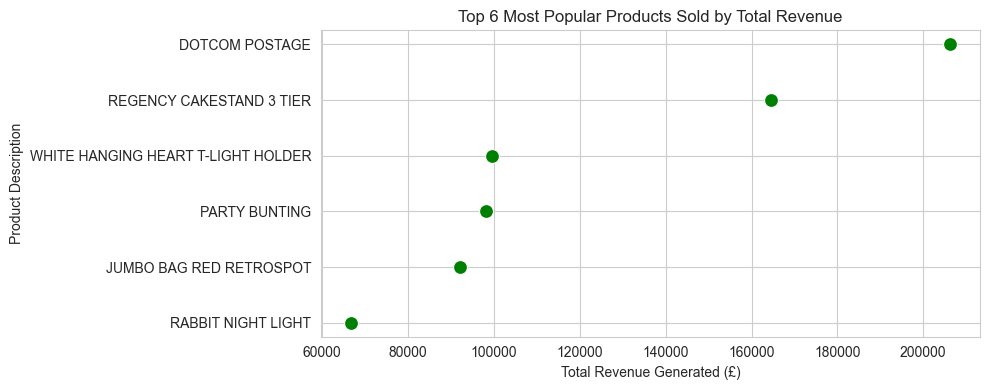

In [12]:
#top 6 products
popular_products = df.groupby('Description')['Total_Transaction_Value'].sum().sort_values(ascending=False).head(6).reset_index()

plt.figure(figsize=(10,4)) #plot size
sns.scatterplot(data=popular_products, x='Total_Transaction_Value', y='Description', s=100, color='green') #plot scatter
plt.title('Top 6 Most Popular Products Sold by Total Revenue') #title of plot
plt.xlabel('Total Revenue Generated (£)') #label of x axis
plt.ylabel('Product Description') #label of y axis
plt.tight_layout()  #adjust layout to prevent overlapping content
plt.show() #display the plot

**Key Insights**

- The top two products (DOTCOM POSTAGE and REGENCY CAKESTAND 3 TIER) generate the highest total revenue, highlighting strong customer demand.
- WHITE HANGING HEART T-LIGHT HOLDER AND PARTY BUNTING also contribute significantly but less than the top two.
- JUMBO BAG RED RETROSPOT and RABBIT NIGHT LIGHT have lower total revenue, indicating they are less popular or sell less frequently.

**Conclusion:**

Focusing marketing and inventory on the top performing products can maximise revenue. There is also potential to promote the lower revenue items to increase their sales and overall product performance.

**Recommendations and Improvements:**

To optimise sales, focus on increasing stock and promoting top selling products. Simultaneously, implement targeted marketing or discounts for lower-performing items to boost their popularity. Regular analysis of sales trends and customer feedback can help identify new opportunities and improve inventory management.

## **Analysing the Correlation Between Quantity Sold and Revenue Generated**

The comparison shows that quantity sold and total revenue do not always have a direct correlation. 

For example, WORLD WAR 2 GLIDERS and REGENCY CAKE STAND generate the highest revenue despite not having the highest sales volume. This indicates they may be higher priced items. 

Conversely, products like JUMBO BAG RED RETROSPOT and RABBIT NIGHT LIGHT have high quantities sold but contribute less to total revenue. This suggests they are lower priced. 

This highlights that higher sales volume does not necessarily equate to higher revenue. Pricing and product value significantly influence revenue outcomes.